In [104]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
from konlpy.tag import Kkma
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import sklearn
import pickle as pickle


In [105]:
pred = pd.read_csv('../code/prediction/dev_train_num2.csv')
labels = pd.read_csv('../data/dataset/train/dev_total.csv')
labels.id=labels.index
labels.head()

,Unnamed: 0,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast
0,29391,0,이날 행사에는 여영국 국회의원과 창원시의회 이찬호 의장이 내빈으로 참석하여 자리를 ...,"{'word': '창원시', 'start_idx': 18, 'end_idx': 20...","{'word': '여영국', 'start_idx': 8, 'end_idx': 10,...",no_relation,wikitree,PER,ORG,1
1,22166,1,광주 남구(구청장 김병내)는 악취로 인해 민원 발생의 원인이 되고 있는 은행나무 열...,"{'word': '광주 남구', 'start_idx': 0, 'end_idx': 4...","{'word': '은행나무', 'start_idx': 40, 'end_idx': 4...",no_relation,wikitree,POH,ORG,0
2,25847,2,영광군 관계자는 “지난 3년간 양식 연구결과에 따르면 참조기는 고수온과 질병에 강하...,"{'word': '영광군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '참조기', 'start_idx': 30, 'end_idx': 32...",no_relation,wikitree,POH,ORG,0
3,2936,3,MVP가 해체한지 1주일 후인 2019년 12월 9일 OZ 게이밍의 코치로 영입되며...,"{'word': '오현식', 'start_idx': 64, 'end_idx': 66...","{'word': 'MVP', 'start_idx': 0, 'end_idx': 2, ...",no_relation,wikipedia,POH,PER,1
4,3118,4,"1887년 홍문관의 부교리를 맡은 것을 시작으로 사간원, 사헌부, 홍문관 등지에서 ...","{'word': '사간원', 'start_idx': 27, 'end_idx': 29...","{'word': '1894년', 'start_idx': 55, 'end_idx': ...",no_relation,wikipedia,DAT,ORG,0


In [106]:
pred.shape, labels.shape

((10223, 3), (10223, 10))

In [107]:
def whatType(string):
    dic = eval(string)
    return dic['type']
def whatIsWord(string):
    dic = eval(string)
    return dic['word']
def when_start(ob_entity,sub_entity):
    ob_idx = eval(ob_entity)['start_idx']
    sub_idx = eval(sub_entity)['start_idx']
    if ob_idx >sub_idx:
        return 0
    return 1



def label_to_num(label):
  num_label = []
  with open('../code/dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [108]:

labels.id=labels.index
labels['object_type'] = labels.object_entity.apply(lambda x: whatType(x))
labels['subject_type'] = labels.subject_entity.apply(lambda x: whatType(x))
labels['fast']= labels.id.apply(lambda x: when_start(labels['object_entity'].loc[x],labels['subject_entity'].loc[x]))


In [109]:


def label_to_num(label):
  num_label = []
  with open('../code/dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [110]:
compare.shape

(10223, 6)

<Axes: xlabel='label'>

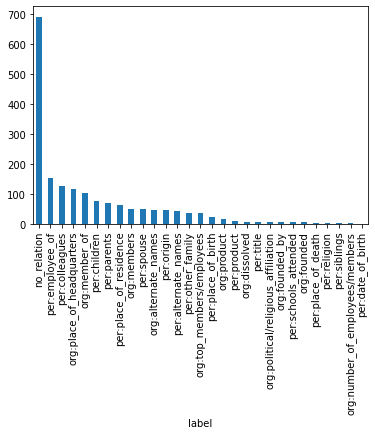

In [111]:
compare = pd.concat([labels[['id','label','subject_type','object_type','fast']],pred.pred_label],axis=1)

compare[compare.label!=compare.pred_label]['label'].value_counts().plot(kind= 'bar')

<Axes: xlabel='pred_label'>

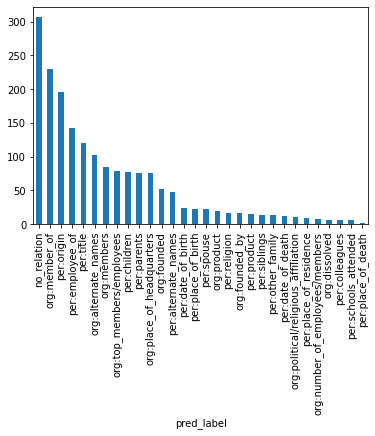

In [112]:
compare[compare.label!=compare.pred_label]['pred_label'].value_counts().plot(kind= 'bar')


<Axes: xlabel='label'>

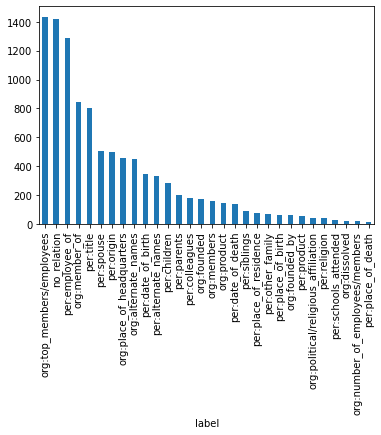

In [113]:
compare['label'].value_counts().plot(kind= 'bar')


<Axes: xlabel='label'>

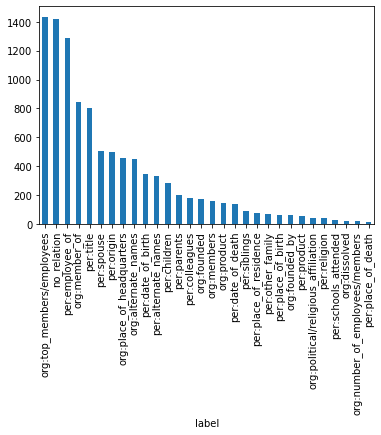

In [114]:
compare.label.value_counts().plot(kind='bar')


<Axes: xlabel='label'>

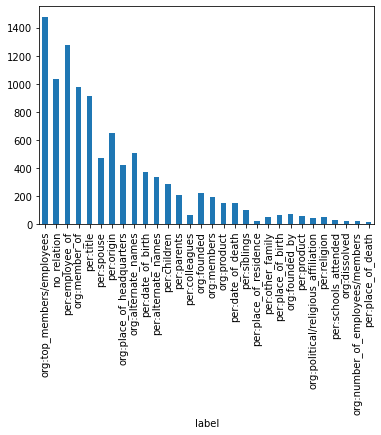

In [115]:
compare.pred_label.value_counts().reindex(compare.label.value_counts().index).plot(kind='bar')


<Axes: xlabel='label'>

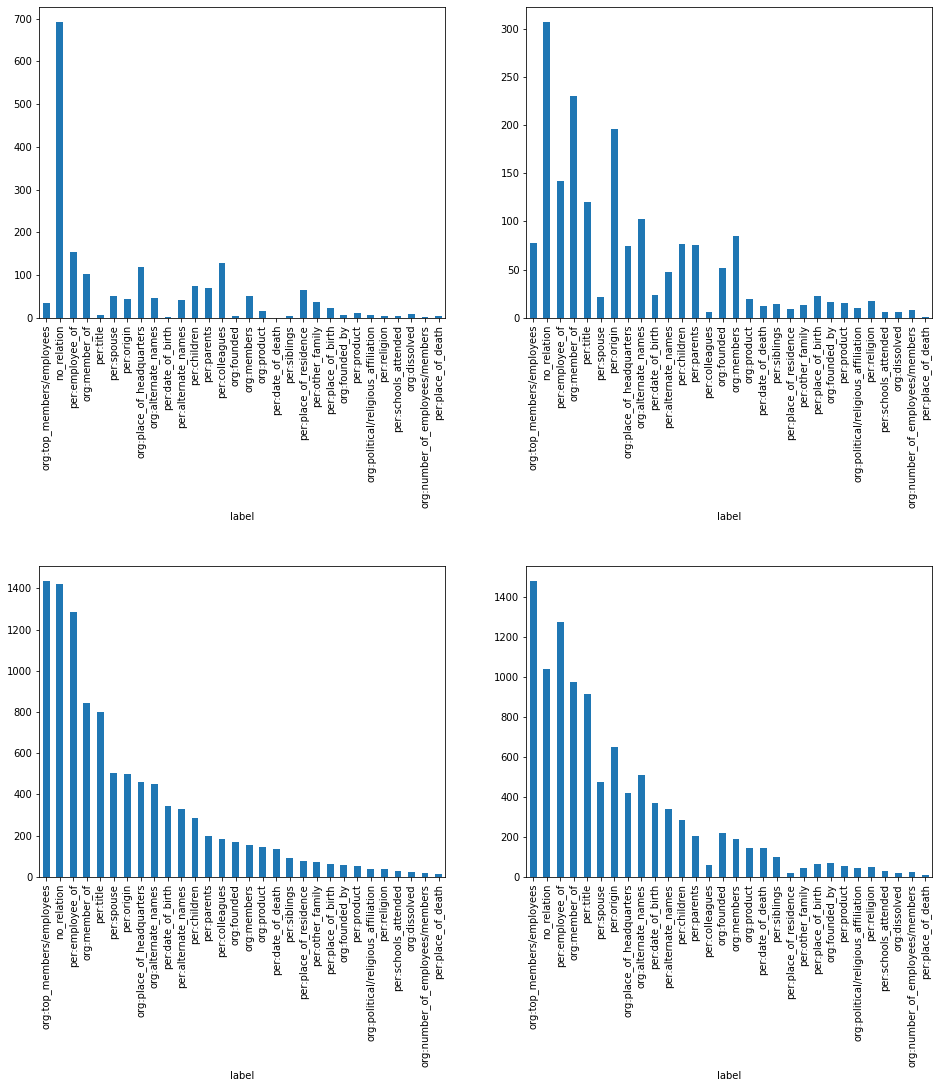

In [116]:
fig ,axes = plt.subplots(2,2,figsize= (16,16))
plt.subplots_adjust(wspace=0.2, hspace=0.8)
axes= axes.flatten()
indx = compare['label'].value_counts().index
compare[compare.label!=compare.pred_label]['label'].value_counts().reindex(indx).plot(kind= 'bar',ax=axes[0])
compare[compare.label!=compare.pred_label]['pred_label'].value_counts().reindex(indx).plot(kind= 'bar',ax=axes[1])
compare['label'].value_counts().plot(kind= 'bar',ax=axes[2])
compare['pred_label'].value_counts().reindex(indx).plot(kind= 'bar',ax=axes[3])


In [117]:
x= pd.crosstab(compare[compare.label!=compare.pred_label]['label'],compare[compare.label!=compare.pred_label]['pred_label'])
x.to_csv('./분석2.csv')

In [118]:
def klue_re_micro_f1(preds, labels):
    """KLUE-RE micro f1 (except no_relation)"""
    label_list = ['no_relation', 'org:top_members/employees', 'org:members',
       'org:product', 'per:title', 'org:alternate_names',
       'per:employee_of', 'org:place_of_headquarters', 'per:product',
       'org:number_of_employees/members', 'per:children',
       'per:place_of_residence', 'per:alternate_names',
       'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings',
       'per:spouse', 'org:founded', 'org:political/religious_affiliation',
       'org:member_of', 'per:parents', 'org:dissolved',
       'per:schools_attended', 'per:date_of_death', 'per:date_of_birth',
       'per:place_of_birth', 'per:place_of_death', 'org:founded_by',
       'per:religion']
    no_relation_label_idx = label_list.index("no_relation")
    preds = label_to_num(preds.values)
    labels = label_to_num(labels.values)

    label_indices = list(range(len(label_list)))
    label_indices.remove(no_relation_label_idx)
    return sklearn.metrics.f1_score(labels, preds, average="micro", labels=label_indices) * 100.0


def label_to_num(label):
  num_label = []
  with open('../code/dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [119]:
print((klue_re_micro_f1(compare.pred_label,compare.label)))


85.42836493022737
